In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [29]:
repository_url = "https://raw.githubusercontent.com/baertsch/FIN-429/main/"
# Revenues (annual frequency)
rev_y = pd.read_excel(repository_url+"DS_REV_USD_Y.xlsx")
# Return index (monthly frequency)
ri_m = pd.read_excel(repository_url+"DS_RI_USD_M.xlsx")
# Return index (annual frequency)
ri_y = pd.read_excel(repository_url+"DS_RI_USD_Y.xlsx")
# Scope 1
scope1 = pd.read_excel(repository_url+"Scope_1.xlsx")
# Scope 2
scope2 = pd.read_excel(repository_url+"Scope_2.xlsx")
# Market capitalization (monthly frequency)
mv_m = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")
# Market capitalization (annual frequency)
mv_y = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")


In [30]:
# Filter for European firms
european_countries = ["AT", "BE", "DK", "FI", "FR", "DE", "IE", "IT", "NL", 
                       "NO", "PT", "ES", "SE", "CH", "GB"]
def filter_europe(df, codes):
    df['Country Code']=df['ISIN'].str[:2]
    df = df[df['Country Code'].isin(codes)]
    return df
rev_y = filter_europe(rev_y,european_countries)
ri_m = filter_europe(ri_m,european_countries)
ri_y = filter_europe(ri_y,european_countries)
scope1 = filter_europe(scope1,european_countries)
scope2 = filter_europe(scope2,european_countries)
mv_m = filter_europe(mv_m,european_countries)
mv_y = filter_europe(mv_y,european_countries)


In [46]:
ri_m

,NaT,NaT,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-28,2000-05-31,2000-06-30,2000-07-31,...,2024-05-31,2024-06-28,2024-07-31,2024-08-30,2024-09-30,2024-10-31,2024-11-29,2024-12-31,2025-01-31,NaT
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204.56,204.41,205.06,212.47,204.94,192.71,199.63,200.28,240.26,AT
5,FLUGHAFEN WIEN,AT00000VIE62,147.79,156.25,153.83,158.62,137.27,148.95,159.68,151.08,...,1996.86,2090.26,2127.00,2320.32,2185.23,2200.73,2173.39,2114.91,2123.14,AT
6,RAIFFEISEN BANK INTL.,AT0000606306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.37,70.38,78.90,80.27,80.70,72.48,78.94,82.80,92.42,AT
7,ERSTE GROUP BANK,AT0000652011,102.94,94.91,97.74,100.50,96.13,97.86,102.06,102.43,...,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47,1131.69,AT
8,TELEKOM AUSTRIA,AT0000720008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294.09,311.40,300.32,319.06,318.44,268.58,268.82,267.24,271.32,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,ELECTROLUX B,SE0016589188,626.16,533.00,470.45,473.03,432.63,431.17,397.88,380.53,...,1411.58,1234.39,1323.56,1433.71,1446.38,1240.35,1110.84,1237.50,1358.80,SE
1711,ATLAS COPCO A,SE0017486889,257.69,221.48,202.18,212.75,209.47,198.64,173.50,187.90,...,13149.83,12955.25,12248.54,12519.58,13347.99,11376.34,11068.91,10605.37,11684.45,SE
1712,MODERN TIMES GROUP MTG B,SE0018012494,81.19,76.83,85.51,79.92,80.98,73.42,78.73,65.79,...,101.69,92.24,87.78,86.17,89.15,81.25,96.38,98.24,106.53,SE
1713,WIHLBORGS FASTIGHETER,SE0018012635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174.14,169.81,185.96,193.55,212.39,191.59,186.07,174.23,182.38,SE


In [32]:
rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_m.iloc[:,2:-1] = ri_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_y.iloc[:,2:-1] = ri_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope1.iloc[:,2:-1] = scope1.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope2.iloc[:,2:-1] = scope2.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_m.iloc[:,2:-1] = mv_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_y.iloc[:,2:-1] = mv_y.iloc[:,2:-1].fillna(method='ffill', axis=1)

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/3426345851.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/3426345851.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/3426345851.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4              NaN
5         305807.0
6              NaN
7        3234567.0
8        36413

# Question 1
We take all our data, so all european firms
Then for question 2 and onward we take all european firms with carbon data

In [45]:

# Assuming ri_m is your DataFrame
# Convert column names to datetime
ri_m.columns = pd.to_datetime(ri_m.columns, errors='coerce')

# Filter columns between 2014 and 2024
filtered_ri_m = ri_m.loc[:, (ri_m.columns.year >= 2014) & (ri_m.columns.year <= 2024)]

# Function to check available years for each row
def check_available_years(row):
    available_years = row.dropna().index.year
    return available_years.unique()

# Apply the function to each row
available_years_per_row = filtered_ri_m.apply(check_available_years, axis=1)

# Print the available years for each row
for index, years in available_years_per_row.items():
    print(f"Row {index} has data available for years: {years.tolist()}")

Row 4 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 5 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 6 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 7 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 8 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 9 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 10 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 11 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 12 has data available for years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Row 13 has data available for years: [2014, 2015, 2016, 2017, 2018, 20

In [33]:
def compute_returns(df):
    data = df.set_index("ISIN").drop(columns=["Country Code", "NAME"]).T
    returns = data.apply(lambda row: row[row.first_valid_index():].pct_change(), axis=1).T # Apply pct_change starting from the first non-NaN value onward for each row
    return returns

monthly_returns = compute_returns(ri_m)
monthly_returns

# Compute Annualized Returns and Volatility
def annualized_stats(returns):
    mean_return = np.mean(returns, axis=1) * 12  # Annualized Return
    volatility = np.std(returns, axis=1) * np.sqrt(12)  # Annualized Volatility
    return mean_return, volatility

annualized_return, annualized_volatility = annualized_stats(monthly_returns)

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_12940/1900171289.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.apply(lambda row: row[row.first_valid_index():].pct_change(), axis=1).T # Apply pct_change starting from the first non-NaN value onward for each row
/Users/nadegelan/MGT-502/.conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [34]:
stats_df = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility
})

In [39]:
# Take a return of 0 for infinite values
stats_df.replace([np.inf, -np.inf], 0, inplace=True)

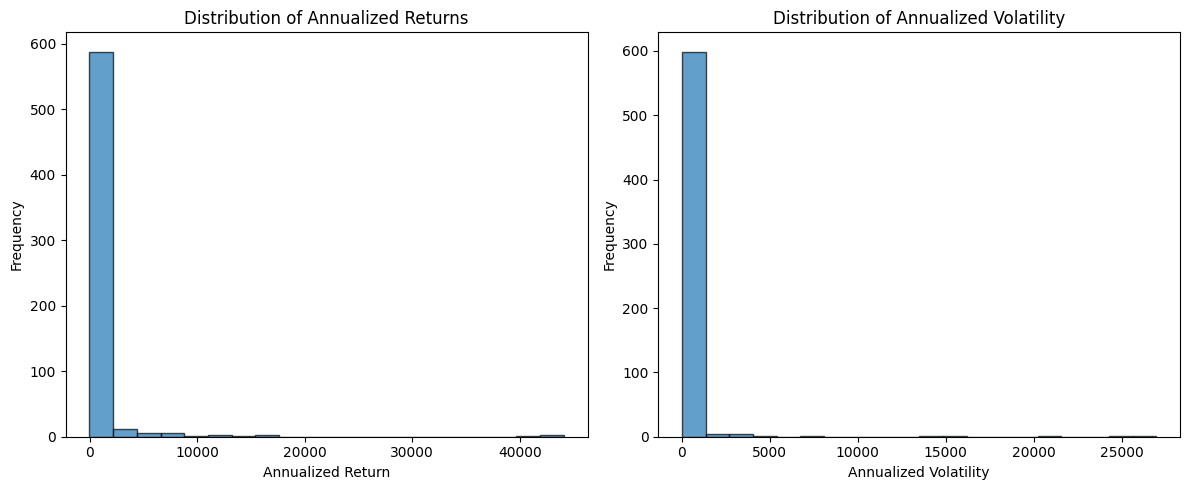

In [40]:
# Plot Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(stats_df["Annualized Return"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Annualized Return")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Returns")

plt.subplot(1, 2, 2)
plt.hist(stats_df["Annualized Volatility"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Annualized Volatility")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Volatility")

plt.tight_layout()
plt.show()